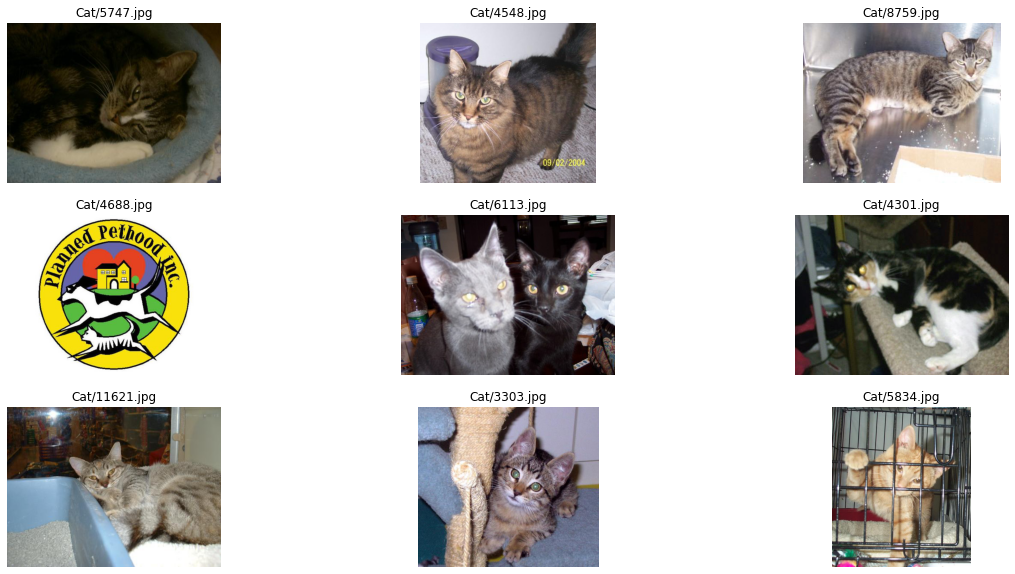

In [47]:
from matplotlib import pyplot as plt
import os
import random

# Get list of file names
_, _, cat_images = next(os.walk('Dataset/PetImages/Cat'))

# Prepare a 3x3 plot (total of 9 images)
fig, ax = plt.subplots(3,3, figsize=(20,10))

# Randomly select and plot an image
for idx, img in enumerate(random.sample(cat_images, 9)):
    img_read = plt.imread('Dataset/PetImages/Cat/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Cat/'+img)
plt.show()

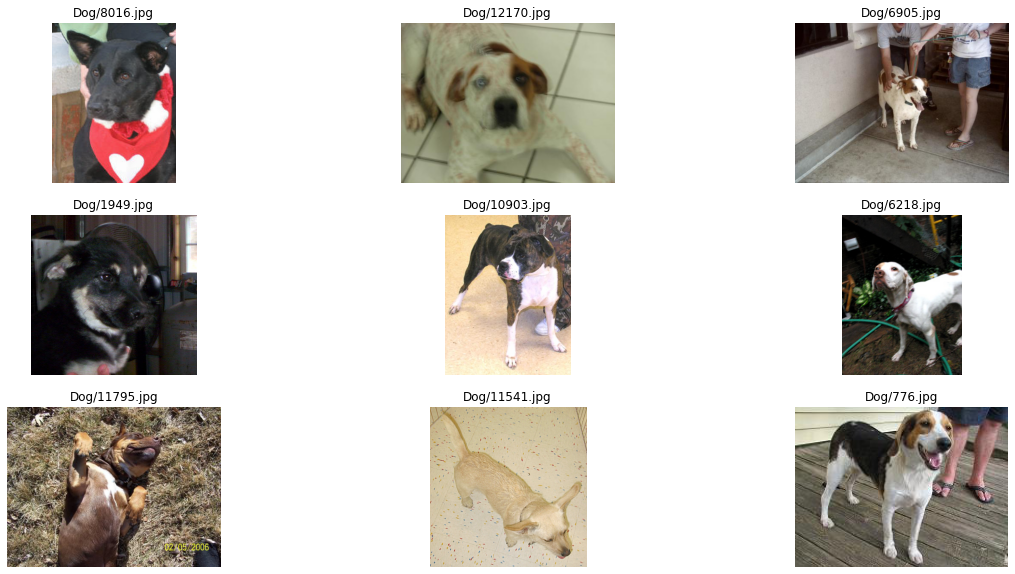

In [103]:
#get the list of filenames
_, _, dog_images = next(os.walk('Dataset/PetImages/Dog'))

#3x3 plot ie 9 images
fig, ax = plt.subplots(3,3, figsize=(20,10))

#randomly select and plot an image
for idx, img in enumerate(random.sample(dog_images,9)):
        img_read = plt.imread('Dataset/PetImages/Dog/' + img)
        ax[int(idx/3) ,idx%3].imshow(img_read)
        ax[int(idx/3), idx%3].axis('off')
        ax[int(idx/3),idx%3].set_title('Dog/'+ img)
plt.show()
        
        
        
        

In [136]:
#helper function to split data into traimport os
import random
import shutil
import piexif

def train_test_split(src_folder, train_size = 0.8):
	# Make sure we remove any existing folders and start from a clean slate
	shutil.rmtree(src_folder+'Train/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Train/Dog/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Dog/', ignore_errors=True)

	# Now, create new empty train and test folders
	os.makedirs(src_folder+'Train/Cat/')
	os.makedirs(src_folder+'Train/Dog/')
	os.makedirs(src_folder+'Test/Cat/')
	os.makedirs(src_folder+'Test/Dog/')

	# Get the number of cats and dogs images
	_, _, cat_images = next(os.walk(src_folder+'Cat/'))
	files_to_be_removed = ['Thumbs.db', '666.jpg', '835.jpg']
	for file in files_to_be_removed:
		cat_images.remove(file)
	num_cat_images = len(cat_images)
	num_cat_images_train = int(train_size * num_cat_images)
	num_cat_images_test = num_cat_images - num_cat_images_train

	_, _, dog_images = next(os.walk(src_folder+'Dog/'))
	files_to_be_removed = ['Thumbs.db', '11702.jpg']
	for file in files_to_be_removed:
		dog_images.remove(file)
	num_dog_images = len(dog_images)
	num_dog_images_train = int(train_size * num_dog_images)
	num_dog_images_test = num_dog_images - num_dog_images_train

	# Randomly assign images to train and test
	cat_train_images = random.sample(cat_images, num_cat_images_train)
	for img in cat_train_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Train/Cat/')
	cat_test_images  = [img for img in cat_images if img not in cat_train_images]
	for img in cat_test_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Test/Cat/')

	dog_train_images = random.sample(dog_images, num_dog_images_train)
	for img in dog_train_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Train/Dog/')
	dog_test_images  = [img for img in dog_images if img not in dog_train_images]
	for img in dog_test_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Test/Dog/')

	# remove corrupted exif data from the dataset
	remove_exif_data(src_folder+'Train/')
	remove_exif_data(src_folder+'Test/')

# helper function to remove corrupt exif data from Microsoft's dataset
def remove_exif_data(src_folder):
	_, _, cat_images = next(os.walk(src_folder+'Cat/'))
	for img in cat_images:
		try:
			piexif.remove(src_folder+'Cat/'+img)
		except:
			pass

	_, _, dog_images = next(os.walk(src_folder+'Dog/'))
	for img in dog_images:
		try:
			piexif.remove(src_folder+'Dog/'+img)
		except:
			pass



In [137]:

src_folder = 'Dataset/PetImages/'
train_test_split(src_folder)

In [175]:
#image augmentation - to apply changes to images. CNN works best with more data
from keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')


In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
all_images[]

_,_,dog_images = next(os.walk('Dataset/PetImages/Train/Dog'))
random_img = random.sample(dog_images,1)[0]
random_img = plt.imread('Dataset/PetImages/Train/Dog/' + random_img)
all_images.append(random_img)






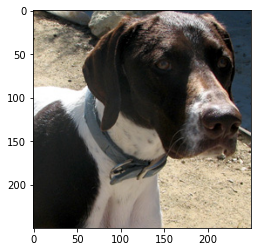

In [146]:
random_img = random_img.reshape((1,) + random_img.shape)
sample_augmented_images = image_generator

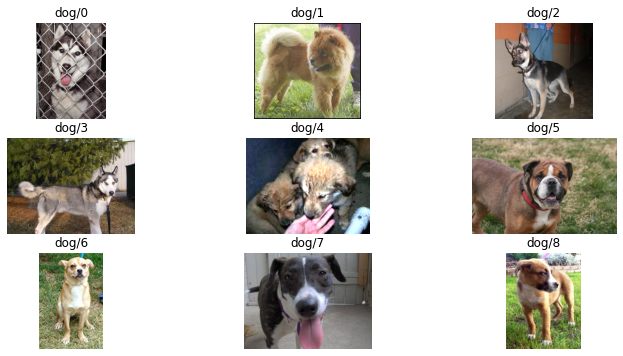

In [160]:
#how did you convert images to numbers/array/matrix for the computer to understand ? plt.imread -Read an image from a file into an array.
fig, ax = plt.subplots(3,3, figsize=(12,6))
_,_,dog = next(os.walk('Dataset/PetImages/Dog'))

for idx, img in enumerate(random.sample(dog,9)):
    img_read = plt.imread('Dataset/PetImages/Dog/' + img)
    ax[int(idx/3),idx%3].imshow(img_read)
    ax[int(idx/3),idx%3].set_title('dog/' + str(idx))
    ax[int(idx/3),idx%3].axis('off')
plt.show()
    
    
    


In [ ]:
#i see it as array + [[[89,44,234]]]
random_img = plt.imread('Dataset/PetImages/Train/Dog/'+random_img)

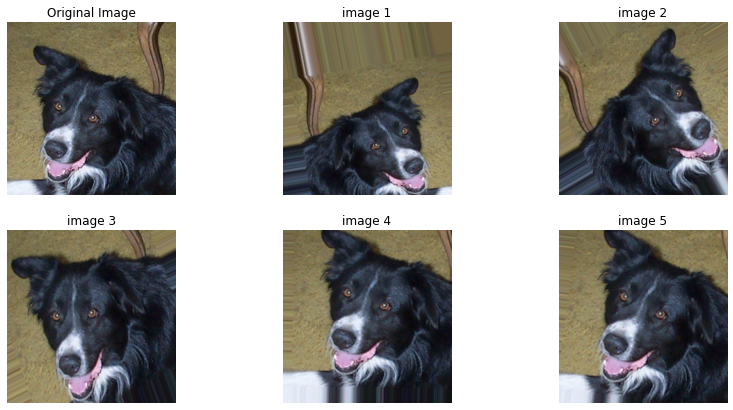

In [176]:
#randomly selected image from training data of dog and augment it to see diff b/n original and augmented
fig, ax = plt.subplots(2,3,figsize=(14,7)) #shape of the graph
all_images = []
_,_,dog = next(os.walk('Dataset/PetImages/Train/Dog/'))#reach the data 
               
random_img = random.sample(dog,1)[0]#random select one image
random_img = plt.imread('Dataset/PetImages/Train/Dog/' + random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,) + random_img.shape) #i think u shape the dimension so say the img_generator can swallow it
sample_augmented_images = image_generator.flow(random_img)


for _ in range(5):
    augmented_imgs = sample_augmented_images.next()
    for img in augmented_imgs:
        all_images.append(img.astype('uint8'))
        
        
        
for idx, img in enumerate(all_images):
    ax[int(idx/3) ,idx%3].imshow(img)
    ax[int(idx/3) ,idx%3].axis('off')
    if idx == 0:
        ax[int(idx/3) ,idx%3].set_title('Original Image')
    else:
        ax[int(idx/3) ,idx%3].set_title(f'image {idx}')
            


plt.show()







In [ ]:
random_img = random.sample(dog,1)[0]

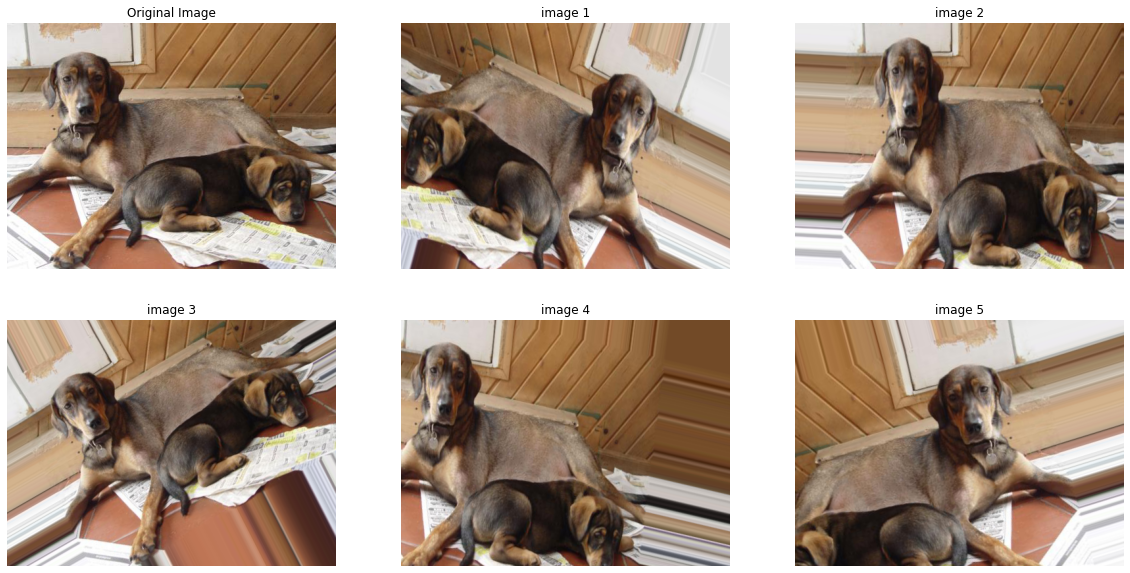

In [212]:
fig , ax = plt.subplots(2,3, figsize=(20,10))

all_images = []

_,_,dog = next(os.walk('Dataset/PetImages/Train/Dog/'))
random_img = random.sample(dog, 1)[0]
random_img = plt.imread('Dataset/PetImages/Train/Dog/' + random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,) + random_img.shape)
augment_img = image_generator.flow(random_img)


for _ in range(5):
    sample_aumgment_img = next(augment_img)
    for img in sample_aumgment_img:
        all_images.append(img.astype('uint8'))
    
    for idx, img in enumerate(all_images):
        ax[int(idx/3), idx%3].imshow(img)
        ax[int(idx/3), idx%3].axis('off')
        if idx == 0:
            ax[int(idx/3), idx%3].set_title('Original Image')
        else:
            ax[int(idx/3), idx%3].set_title(f'image {idx}')
                
                


In [185]:
random_img = random.sample(dog, 1)[0]
random_img

'4631.jpg'

In [232]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.preprocessing.image import ImageDataGenerator


filter_size = 3
num_filters = 32
input_size = 32
maxpool_size = 2
batch_size = 16
steps_per_epoch = 20000/batch_size
epochs = 10

model = Sequential()

model.add(Conv2D(num_filters,(filter_size,filter_size),input_shape=(input_size,input_size,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(maxpool_size,maxpool_size)))

model.add(Conv2D(num_filters,(filter_size,filter_size),input_shape=(input_size,input_size,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(maxpool_size,maxpool_size)))

#to flatten it to 1D before passing it to fully connected layer
model.add(Flatten())

#fully connected layer with 128 nodes
model.add(Dense(units=128, activation='relu'))

#to make the model not to put too much value on certain weights ,we will set 50% to 0
model.add(Dropout(0.5))

#last fully connected layer should have one node as we doing classification(cat & dog)
model.add(Dense(units=1,activation='sigmoid'))

#compile
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [233]:
#ImageDataGenerator and flow_from_directory method to train our model in real time,
#which loads batches(flow_from_directory) of the dataset(training_data_generator) into memory only as required

training_data_generator = ImageDataGenerator(rescale = 1./255)
train_set = training_data_generator.flow_from_directory('Dataset/PetImages/Train/', target_size=(input_size,input_size),
                                                       batch_size=batch_size,class_mode='binary')
model.fit_generator(train_set,steps_per_epoch = steps_per_epoch, epochs = epochs,verbose=1)
#why np.utils.to_categorical then binary_crossentropy but this one didnt introduce it
#sparse_binary_crossentropy de3 its not binary

Found 19997 images belonging to 2 classes.
Epoch 1/10
1250/1250 [==============================] - 71s 56ms/step - loss: 0.6671 - accuracy: 0.5757
Epoch 2/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.5503 - accuracy: 0.7268
Epoch 3/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.4982 - accuracy: 0.7584
Epoch 4/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.4627 - accuracy: 0.7799
Epoch 5/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.4407 - accuracy: 0.7943
Epoch 6/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.4179 - accuracy: 0.8096
Epoch 7/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.3929 - accuracy: 0.8231
Epoch 8/10
1250/1250 [==============================] - 68s 54ms/step - loss: 0.3644 - accuracy: 0.8382
Epoch 9/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.3459 - accuracy: 0.8486
Epoch 10/10
1250/1250

In [234]:
testing_data_generator = ImageDataGenerator(rescale=1./255)
testing_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(input_size,input_size),
                                                       batch_size=batch_size,class_mode='binary')

score = model.evaluate_generator(testing_set, steps=len(testing_set))
for idx, metric in enumerate(model.metrics_names):
    print(f'{metric} : {score[idx]}') 

Found 5000 images belonging to 2 classes.
loss : 0.4835343658924103
accuracy : 0.7871999740600586


In [ ]:
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32, (3,3),input_shape = (32,32,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])





In [ ]:
image_generator = ImageDataGenerator(rescale=1/255)
dataset = image_generator.flow_from_directory('Dataset/PetImages/Train/', target_size=(32,32), batch_size=16,
                                             class_mode='binary')
model.fit_generator(dataset, steps_per_epoch=1250, epochs=10,verbose=1 )

In [239]:
#from keras.applications.vgg16 import VGG16
input_size = 128
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))#include_top=False(dont include the fully
#connected layer, we go that ourselves)


58892288/58889256 [==============================] - 21s 0us/step


In [240]:
#to freeze the cnn(vgg16)
for layer in vgg16.layers:
    layer.trainable = False
    

In [243]:
#adding fully connected layer to the NN but its syntax is different since VGG16 didnt use keras Sequential Model
from keras.models import Model
 
input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(inputs=input_, outputs=last_layer)


In [250]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

training_data_generator = ImageDataGenerator(rescale=1/255)
testing_data_generator = ImageDataGenerator(rescale=1/255)

training_set = training_data_generator.flow_from_directory('Dataset/PetImages/Train/',target_size=(input_size,input_size),batch_size=16,
                                                          class_mode='binary')

testing_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(input_size,input_size),batch_size=16,
                                                          class_mode='binary')

model.fit_generator(training_set, steps_per_epoch=200,epochs=3,verbose=1)


Found 19997 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/3


InvalidArgumentError:  Incompatible shapes: [256,1] vs. [16,1]
	 [[node gradient_tape/binary_crossentropy/logistic_loss/mul/BroadcastGradientArgs (defined at <ipython-input-250-2566472de1e1>:12) ]] [Op:__inference_train_function_42165]

Function call stack:
train_function


In [251]:
score = model.evaluate_generator(testing_set, len(testing_set))
for idx,metric in enumerate(model.metrics_names):
    print(f'{metric}: {score[idx]}')
    

InvalidArgumentError:  Incompatible shapes: [256,1] vs. [16,1]
	 [[node Equal (defined at <ipython-input-251-6334ceaea0d1>:1) ]] [Op:__inference_test_function_42400]

Function call stack:
test_function


In [ ]:
#result analysis
test_set = testing_data_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(input_size,input_size), 
                                              batch_size=1,class_mode='binary')

strongly_right_idx=[]
strongly_wrong_idx=[]
weakly_wrong_idx=[]

for i in range(test_set.__len__()):
    




In [265]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu' ))

model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [266]:
image_generator = ImageDataGenerator(rescale=1/255)
train_set = image_generator.flow_from_directory('Dataset/PetImages/Train/',target_size=(32,32),class_mode='binary',batch_size=16 )


model.fit_generator(train_set,steps_per_epoch=1250,epochs=10,verbose=1)

Found 19997 images belonging to 2 classes.
Epoch 1/10
1250/1250 [==============================] - 66s 52ms/step - loss: 0.6761 - accuracy: 0.5627
Epoch 2/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.5637 - accuracy: 0.7062
Epoch 3/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.5042 - accuracy: 0.7534
Epoch 4/10
1250/1250 [==============================] - 64s 52ms/step - loss: 0.4677 - accuracy: 0.7779
Epoch 5/10
1250/1250 [==============================] - 63s 51ms/step - loss: 0.4339 - accuracy: 0.7969
Epoch 6/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.4103 - accuracy: 0.8139
Epoch 7/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.3957 - accuracy: 0.8192
Epoch 8/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.3634 - accuracy: 0.8420
Epoch 9/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.3399 - accuracy: 0.8503
Epoch 10/10
1250/1250

In [268]:
image_generator = ImageDataGenerator(rescale=1/255)
test_set = image_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(32,32),class_mode='binary',batch_size=16 )


score = model.evaluate_generator(test_set,steps=len(test_set))

for idx, metric in enumerate(model.metrics_names):
    print(f'{metric} {score[idx]}')

Found 5000 images belonging to 2 classes.
loss 0.4713154435157776
accuracy 0.7901999950408936


In [277]:
#from keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False, input_shape=(32,32,3))#dont include fully connected layer ,we will do that

for layer in vgg16.layers:
    layer.trainable = False #freeze the convolutional pooling layer


In [278]:
from keras.models import Model 

input_ = vgg16.input
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(inputs=input_, outputs=last_layer)

In [280]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_image_generator = ImageDataGenerator(rescale=1./255)
train_set = train_image_generator.flow_from_directory('Dataset/PetImages/Train/',target_size=(48,48),class_mode='binary',batch_size=16 )


model.fit_generator(train_set,steps_per_epoch=200,epochs=3,verbose=1)

Found 19997 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 42s 204ms/step - loss: 0.7087 - accuracy: 0.5306
Epoch 2/3
200/200 [==============================] - 40s 199ms/step - loss: 0.6079 - accuracy: 0.6753
Epoch 3/3
200/200 [==============================] - 42s 211ms/step - loss: 0.5450 - accuracy: 0.7385


In [287]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_set = test_image_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(50,50),class_mode='binary',batch_size=16 )


score = model.evaluate_generator(test_set,steps=len(test_set))

for idx, metric in enumerate(model.metrics_names):
    print(f'{metric} {score[idx]}')

Found 5000 images belonging to 2 classes.
loss 0.5428633093833923
accuracy 0.7342000007629395


In [ ]:
test_set = test_image_generator.flow_from_directory('Dataset/PetImages/Test/',target_size=(50,50),class_mode='binary',batch_size=1 )
strongly_wrong_idx = []
strongly_right_idx = []
weakly_wrong_idx = []

for i in range(test_set.__len__()):
    img = test_set.__getitem__(i)[0]
    pred_prob = model.predict(img)[0][0]
    pred_label = int(pred_prob > 0.5)
    actual_label f= int(test_set.__getitem__(i)[1][0])
    if pred_label != actual_label and ()
        
                       

In [298]:
a = [[1,2,4],[4,5,6]]
for i in range(len(a)):
    a.__getitem__(i)[0]
    print(a)

[[1, 2, 4], [4, 5, 6]]
[[1, 2, 4], [4, 5, 6]]
